# LSTM-Introduction

For classifying MNIST digits. 

#### Intall Tensorflow

In [38]:
#pip install tensorflow==2.0.0-beta0
#pip install --upgrade tensorflow==2.0.0-beta0

In [39]:
import tensorflow as tf
from tensorflow import keras  # tf.keras
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import time

In [40]:
sns.set()
%matplotlib inline
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [41]:
print("python", sys.version)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

python 3.7.1 (default, Dec 14 2018, 13:28:58) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
matplotlib 3.0.2
numpy 1.15.4
pandas 0.23.4
sklearn 0.20.1
tensorflow 2.0.0-beta0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


#### Load data

In [42]:
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

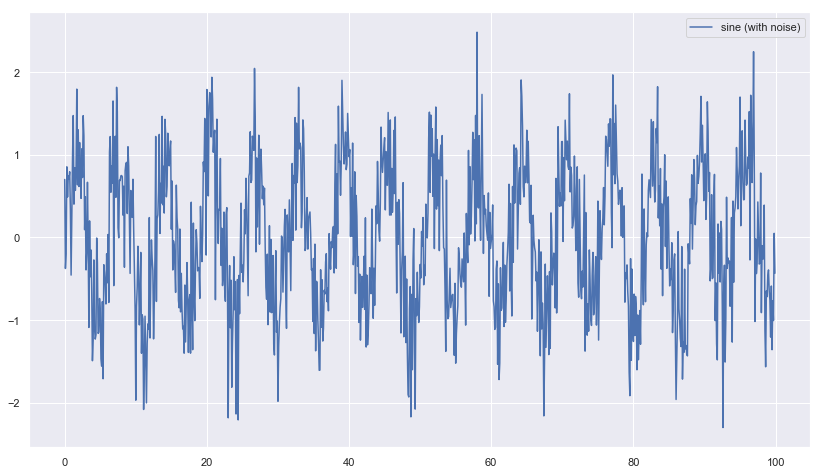

In [43]:
plt.figure(figsize = [14,8])
plt.plot(time, sin, label='sine (with noise)');
plt.legend();

In [44]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
df.head()

,sine
0.0,0.699236
0.1,-0.377399
0.2,-0.200619
0.3,0.851897
0.4,0.487359


In [45]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [46]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [47]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)

print(X_train.shape, y_train.shape)

(790, 10, 1) (790,)


### Model

In [48]:
model = keras.models.Sequential([
    
    keras.layers.LSTM(units=128,\
                      input_shape=(X_train.shape[1],X_train.shape[2])),
    
    keras.layers.Dense(units=1)
    
    ])

In [49]:
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [50]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 711 samples, validate on 79 samples
Epoch 1/30
711/711 [==============================] - 1s 2ms/sample - loss: 0.4392 - val_loss: 0.3535
Epoch 2/30
711/711 [==============================] - 0s 478us/sample - loss: 0.3619 - val_loss: 0.3273
Epoch 3/30
711/711 [==============================] - 0s 482us/sample - loss: 0.3554 - val_loss: 0.3271
Epoch 4/30
711/711 [==============================] - 0s 497us/sample - loss: 0.3540 - val_loss: 0.3273
Epoch 5/30
711/711 [==============================] - 0s 462us/sample - loss: 0.3530 - val_loss: 0.3276
Epoch 6/30
711/711 [==============================] - 0s 460us/sample - loss: 0.3522 - val_loss: 0.3278
Epoch 7/30
711/711 [==============================] - 0s 459us/sample - loss: 0.3516 - val_loss: 0.3280
Epoch 8/30
711/711 [==============================] - 0s 474us/sample - loss: 0.3511 - val_loss: 0.3280
Epoch 9/30
711/711 [==============================] - 0s 470us/sample - loss: 0.3505 - val_loss: 0.3277
Epoch 10/30
711/711 [

### Evaluation

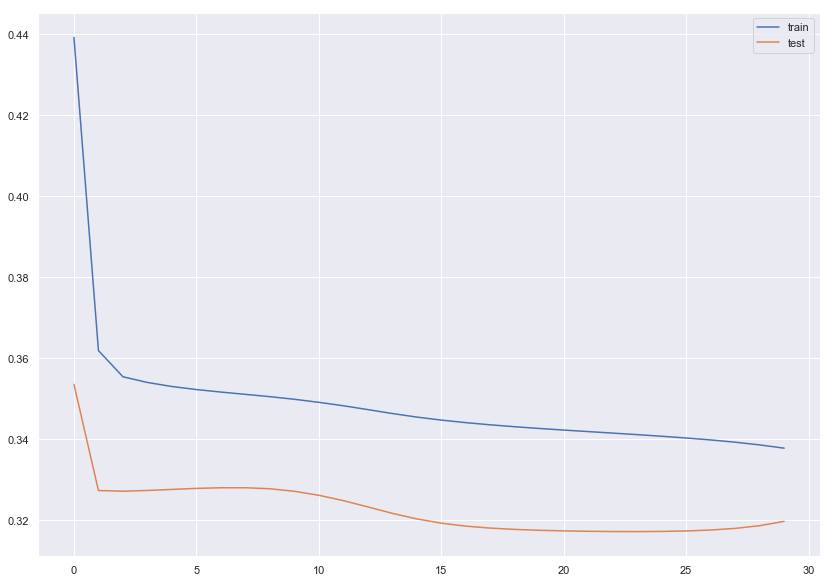

In [51]:
plt.figure(figsize=[14,10])
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [52]:
y_pred = model.predict(X_test)

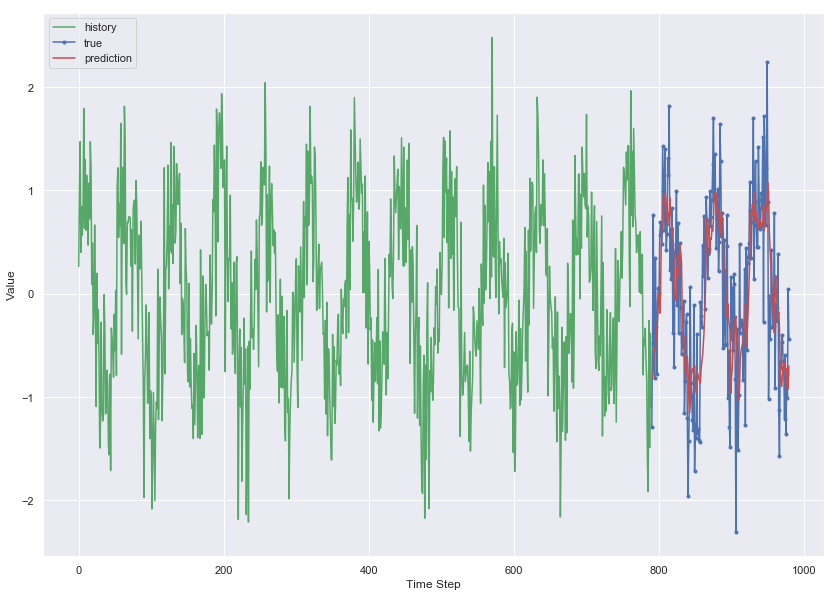

In [53]:
plt.figure(figsize=[14,10])
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

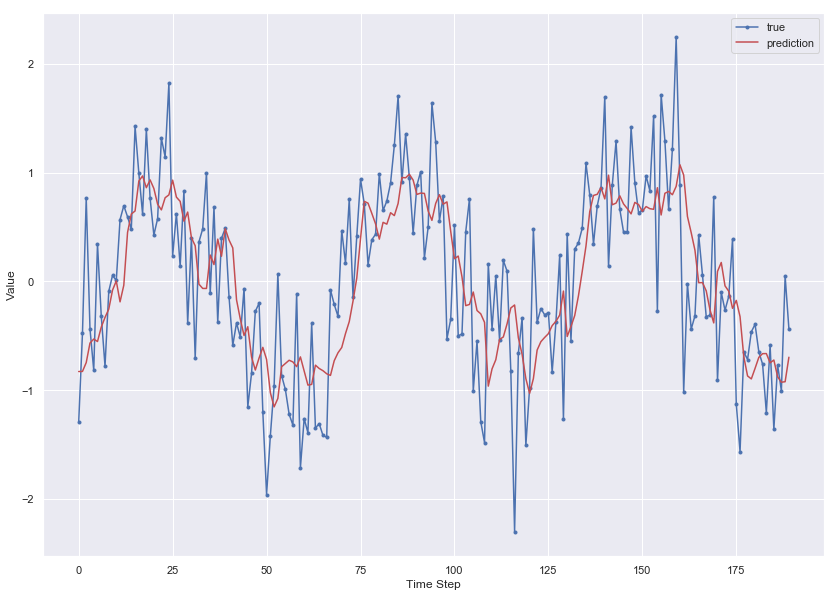

In [54]:
plt.figure(figsize=[14,10])
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();